# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# Set url and units variables, and combine them to get the query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create empty lists to store the data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []
date_list= []

# Loop through cities list
for city in cities:
    
    # Get the JSON response from the Open Weather API
    response_json = requests.get(query_url + city).json()
    
    # Retrieve the Open Weather APIT info for each field and append them to the empty lists  
    try:
        
        city_id = response_json["id"]
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp_max']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
        
        date = response_json['dt']
        date_list.append(date)
    
        print(f"Processing: {city} | City ID: {city_id}")
    
    # Print error message and move on to the next city if not found in Open Weather API
    except:
        
        print("City not found. Skipping...")

# Format print log
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Processing: leshukonskoye | City ID: 535839
Processing: mount isa | City ID: 2065594
Processing: rikitea | City ID: 4030556
Processing: la asuncion | City ID: 3480908
Processing: vaini | City ID: 4032243
Processing: lompoc | City ID: 5367788
Processing: tuktoyaktuk | City ID: 6170031
Processing: bluff | City ID: 2206939
Processing: kapaa | City ID: 5848280
Processing: myitkyina | City ID: 1307741
Processing: saint george | City ID: 5546220
City not found. Skipping...
Processing: comodoro rivadavia | City ID: 3860443
Processing: sainte-suzanne | City ID: 935248
Processing: georgetown | City ID: 1735106
Processing: pevek | City ID: 2122090
Processing: nyzhni sirohozy | City ID: 699986
Processing: narsaq | City ID: 3421719
Processing: balikpapan | City ID: 1650527
Processing: anahuac | City ID: 4013726
Processing: busselton | City ID: 2075265
Processing: jalu | City ID: 86049
Processing: eureka | City ID: 5563397
Processing: punta arenas | City ID: 3874787
City not found. Skipping...
Proc

Processing: zhigansk | City ID: 2012530
Processing: soderhamn | City ID: 2676224
Processing: gladstone | City ID: 2165478
City not found. Skipping...
Processing: la libertad | City ID: 3655131
Processing: souillac | City ID: 933995
Processing: maputo | City ID: 1040652
Processing: norman wells | City ID: 6089245
Processing: port maria | City ID: 3488985
Processing: nemuro | City ID: 2128975
City not found. Skipping...
Processing: padang | City ID: 1633419
Processing: tornio | City ID: 634093
Processing: pangkalanbuun | City ID: 1632694
Processing: north myrtle beach | City ID: 4589446
City not found. Skipping...
Processing: vostok | City ID: 2013279
Processing: saint anthony | City ID: 5044290
Processing: crossville | City ID: 4616470
City not found. Skipping...
Processing: yenotayevka | City ID: 467479
Processing: longyearbyen | City ID: 2729907
Processing: long beach | City ID: 5367929
City not found. Skipping...
City not found. Skipping...
Processing: bjornevatn | City ID: 780643
Pr

Processing: praya | City ID: 3374333
Processing: wanning | City ID: 1791779
Processing: whitehorse | City ID: 6180550
Processing: qasigiannguit | City ID: 3420768
Processing: son tay | City ID: 1567621
Processing: san cristobal | City ID: 3628473
Processing: cherskiy | City ID: 2126199
Processing: nelson bay | City ID: 2155562
Processing: agirish | City ID: 1512101
Processing: vysokogornyy | City ID: 2013216
City not found. Skipping...
Processing: rocha | City ID: 3440777
Processing: tevriz | City ID: 1489661
Processing: haines junction | City ID: 5969025
Processing: kupino | City ID: 1501365
Processing: linares | City ID: 3883167
Processing: pflugerville | City ID: 4718711
Processing: nizhniy mamon | City ID: 520564
City not found. Skipping...
Processing: mana | City ID: 3381041
Processing: udachnyy | City ID: 2014624
Processing: iralaya | City ID: 3608828
Processing: cap malheureux | City ID: 934649
Processing: chatham | City ID: 2653305
Processing: borovskoy | City ID: 1525121
Proce

Processing: taber | City ID: 6160919
Processing: salina cruz | City ID: 3520064
Processing: zwedru | City ID: 2272491
------------------------------
Data Retrieval Complete
------------------------------


In [9]:
# Check List lengths
print(len(city_name_list))
print(len(city_id_list))
print(len(lat_list))
print(len(lng_list))
print(len(temp_list))
print(len(humidity_list))
print(len(clouds_list))
print(len(wind_speed_list))
print(len(country_list))
print(len(date_list))

583
583
583
583
583
583
583
583
583
583


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
# Create DataFrame
weather_df = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : clouds_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : temp_list,
                "Wind Speed" : wind_speed_list
})
weather_df.to_csv("Weather_Py_data.csv")
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Leshukonskoye,99,RU,1603168845,99,64.90,45.76,28.40,2.91
1,Mount Isa,12,AU,1603168814,14,-20.73,139.50,98.60,6.93
2,Rikitea,0,PF,1603168637,78,-23.12,-134.97,74.26,13.47
3,La Asuncion,0,VE,1603168845,63,11.03,-63.86,91.40,10.29
4,Vaini,40,TO,1603168845,73,-21.20,-175.20,75.20,10.29


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
# Check for rows with max humidity
weather_df[weather_df["Humidity"]==weather_df["Humidity"].max()]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
32,Jamestown,90,US,1603168932,100,42.10,-79.24,54.00,3.36
105,Barcelos,75,PT,1603168939,100,41.54,-8.62,60.80,12.75
118,Krasnaya Gora,75,RU,1603168941,100,53.00,31.60,33.80,13.42
149,Hamilton,90,US,1603168944,100,39.18,-84.53,54.00,1.14
202,Tornio,90,FI,1603168949,100,65.85,24.15,24.80,6.93
284,Ketchikan,1,US,1603168958,100,55.34,-131.65,42.80,5.82
286,Fortuna,90,US,1603168958,100,40.60,-124.16,55.99,5.82
300,Benton,90,US,1603168960,100,36.33,-94.33,50.00,3.36
327,Harbour Breton,72,CA,1603168962,100,47.48,-55.80,48.99,9.69
331,Almaznyy,0,RU,1603168963,100,48.04,40.05,37.40,4.47


No cities with humidity over 100%- max humidity is 100. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

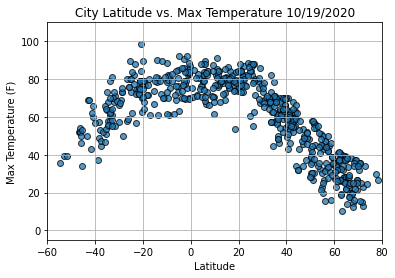

In [31]:
x_val= weather_df["Lat"]
y_val= weather_df["Max Temp"]


plt.scatter(x_val, y_val, marker="o", alpha=.75, edgecolors="k")
plt.title("City Latitude vs. Max Temperature 10/19/2020")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-60, 80)
plt.ylim(-5, 110)
plt.grid()
plt.show()
#plt.savefig('max_temperature')

In [32]:
#hold

## Latitude vs. Humidity Plot

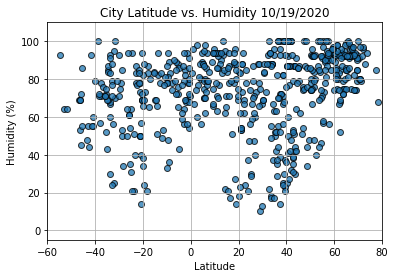

In [33]:
x_val= weather_df["Lat"]
y_val= weather_df["Humidity"]

plt.scatter(x_val, y_val, marker="o", alpha=.75, edgecolors="k")
plt.title("City Latitude vs. Humidity 10/19/2020")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-60, 80)
plt.ylim(-5, 110)
plt.grid()
plt.show()
#plt.savefig('humidity')

## Latitude vs. Cloudiness Plot

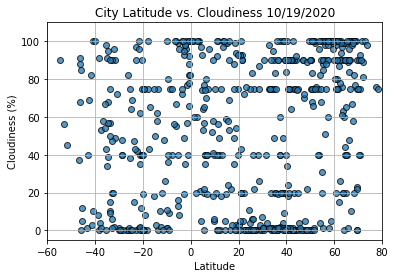

In [34]:
x_val= weather_df["Lat"]
y_val= weather_df["Cloudiness"]

plt.scatter(x_val, y_val, marker="o", alpha=.75, edgecolors="k")
plt.title("City Latitude vs. Cloudiness 10/19/2020")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-60, 80)
plt.ylim(-5, 110)
plt.grid()
plt.show()
#plt.savefig('cloudiness')

## Latitude vs. Wind Speed Plot

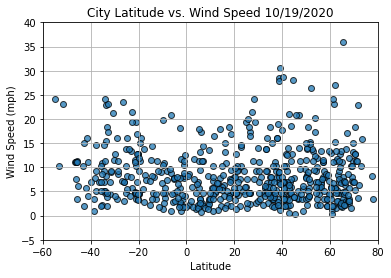

In [35]:
x_val= weather_df["Lat"]
y_val= weather_df["Wind Speed"]

plt.scatter(x_val, y_val, marker="o", alpha=.75, edgecolors="k")
plt.title("City Latitude vs. Wind Speed 10/19/2020")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-60, 80)
plt.ylim(-5, 40)
plt.grid()
plt.show()
#plt.savefig('wind_speed')

## Linear Regression

In [36]:
# Create Northern and Southern Hemisphere DataFrames
equator = weather_df['Lat'] > 0
northern_hemisphere = weather_df[equator]
southern_hemisphere = weather_df[~equator]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.89756652187579


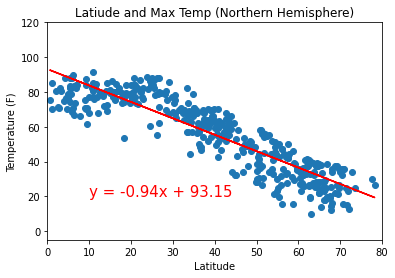

In [42]:
# Set variables
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]

# Perform linear regression
slope, intercept, r, p, stderr = linregress(x_values, y_values)

# Slope equation
regress_values = x_values * slope + intercept

# Add line  
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.ylim(-5, 120)
plt.xlim(0, 80)
plt.title("Latitude and Max Temp (Northern Hemisphere)")
print(f"The r-value is: {r}")
plt.show()
#plt.savefig("north_lat_temp_regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7106026504852


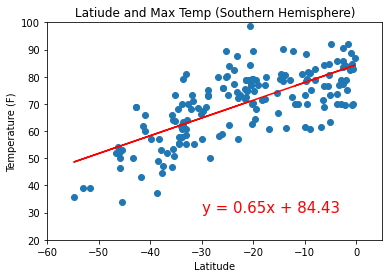

In [48]:
# Set variables
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]

# Perform linear regression
slope, intercept, r, p, stderr = linregress(x_values, y_values)

# Slope equation
regress_values = x_values * slope + intercept

# Add line  
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.ylim(20, 100)
plt.xlim(-60, 5)
plt.title("Latitude and Max Temp (Southern Hemisphere)")
print(f"The r-value is: {r}")
plt.show()
#plt.savefig("south_lat_temp_regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.20587160995471326


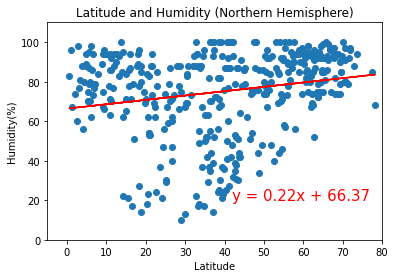

In [92]:
# Set variables
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

# Perform linear regression
slope, intercept, r, p, stderr = linregress(x_values, y_values)

# Slope equation
regress_values = x_values * slope + intercept

# Add line  
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(42,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.ylim(0, 110)
plt.xlim(-5, 80)
plt.title("Latitude and Humidity (Northern Hemisphere)")
print(f"The r-value is: {r}")
plt.show()
#plt.savefig("north_lat_humid_regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1276674672062451


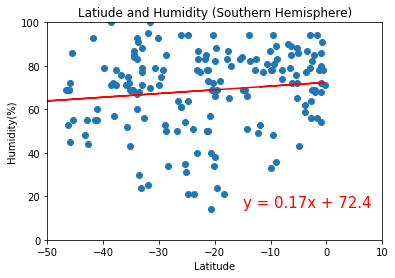

In [60]:
# Set variables
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

# Perform linear regression
slope, intercept, r, p, stderr = linregress(x_values, y_values)

# Slope equation
regress_values = x_values * slope + intercept

# Add line  
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-15,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.ylim(0, 100)
plt.xlim(-50, 10)
plt.title("Latitude and Humidity (Southern Hemisphere)")
print(f"The r-value is: {r}")
plt.show()
#plt.savefig("south_lat_humid_regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.25517334708001393


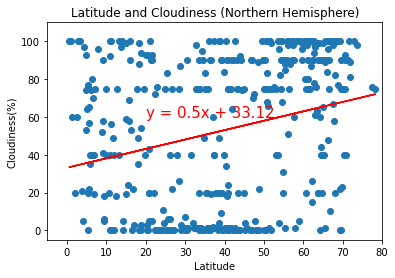

In [87]:
# Set variables
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]

# Perform linear regression
slope, intercept, r, p, stderr = linregress(x_values, y_values)

# Slope equation
regress_values = x_values * slope + intercept

# Add line  
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.ylim(-5, 110)
plt.xlim(-5, 80)
plt.title("Latitude and Cloudiness (Northern Hemisphere)")
print(f"The r-value is: {r}")
plt.show()
#plt.savefig("north_lat_cloud_regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.17875963689895658


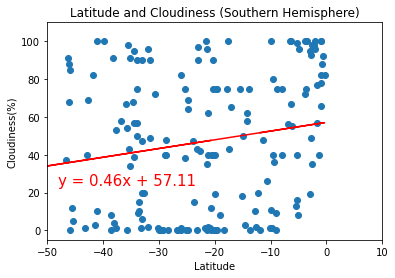

In [83]:
# Set variables
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]

# Perform linear regression
slope, intercept, r, p, stderr = linregress(x_values, y_values)

# Slope equation
regress_values = x_values * slope + intercept

# Add line  
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-48,24),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.ylim(-5, 110)
plt.xlim(-50, 10)
plt.title("Latitude and Cloudiness (Southern Hemisphere)")
print(f"The r-value is: {r}")
plt.show()
#plt.savefig("south_lat_cloud_regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.09470833459010738


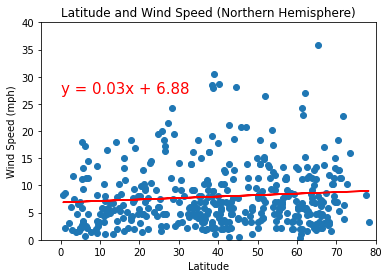

In [82]:
# Set variables
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

# Perform linear regression
slope, intercept, r, p, stderr = linregress(x_values, y_values)

# Slope equation
regress_values = x_values * slope + intercept

# Add line  
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,27),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(0, 40)
plt.xlim(-5, 80)
plt.title("Latitude and Wind Speed (Northern Hemisphere)")
print(f"The r-value is: {r}")
plt.show()
#plt.savefig("north_lat_wind_regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.25320107547930765


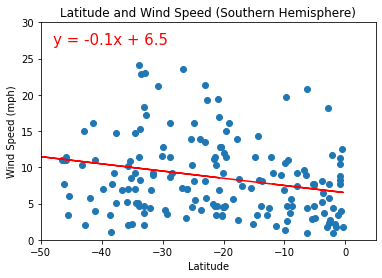

In [75]:
# Set variables
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

# Perform linear regression
slope, intercept, r, p, stderr = linregress(x_values, y_values)

# Slope equation
regress_values = x_values * slope + intercept

# Add line  
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-48,27),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(0, 30)
plt.xlim(-50, 5)
plt.title("Latitude and Wind Speed (Southern Hemisphere)")
print(f"The r-value is: {r}")
plt.show()
#plt.savefig("south_lat_wind_regression.png")